# Preprocesamiento datos Alquiler AMBA

### Importar librerías

In [379]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Cargar el archivo a procesar

In [380]:
"path_toia = '/Users/victoria/Desktop/alquiler_AMBA_dev.csv'"
path_toia = '/Users/benjavitale/Documents/ML/TP_F/alquiler_AMBA_dev.csv'
df_original = pd.read_csv(path_toia, low_memory=False)
df_original.head()

,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,...,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
0,59362,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,...,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
1,68287,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,...,0,0,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
2,59774,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,...,0,0,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
3,62402,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,...,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
4,57804,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,...,No,0,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


In [381]:
df = pd.read_csv(path_toia, low_memory=False)
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")
df.head()

El dataset tiene 278725 filas y 45 columnas.


,id_grid,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,...,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,LONGITUDE,LATITUDE,precio_pesos_constantes,year
0,59362,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,...,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,-58.566145,-34.599299,6.279294e+03,2022
1,68287,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,...,0,0,Capital Federal,Capital Federal,Núñez,U,-58.473708,-34.551759,1.092339e+04,2021
2,59774,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,...,0,0,Capital Federal,Capital Federal,NaN,U,-58.385136,-34.599685,1.081992e+04,2021
3,62402,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,...,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,-58.393617,-34.585162,1.230069e+05,2022
4,57804,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,...,No,0,Capital Federal,Capital Federal,Monserrat,U,-58.376592,-34.610603,7.714647e+06,2021


### Exploración de los Datos

In [382]:
df.describe()

,id_grid,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,Cocheras,PistaJogging,Lobby,LocalesComerciales,AreaParrillas,LONGITUDE,LATITUDE,precio_pesos_constantes,year
count,278725.000000,2.787050e+05,2.787050e+05,278725.000000,278725.000000,278725.000000,278725.000000,188004.0,188004.0,188004.0,253676.000000,278725.000000,278725.000000,2.787250e+05,278725.000000
mean,59833.062739,3.739940e+03,3.356831e+04,1.422237,1.335632,2.389473,0.402454,0.0,0.0,0.0,0.035301,-58.481580,-34.597932,8.088557e+04,2021.481776
std,14774.014764,9.492445e+05,8.415217e+06,1.199622,1.023134,1.392421,2.088215,0.0,0.0,0.0,0.184540,0.115362,0.081715,6.675325e+05,0.499669
min,124.000000,0.000000e+00,0.000000e+00,0.000000,-1.000000,0.000000,-4.000000,0.0,0.0,0.0,0.000000,-58.874595,-34.923504,4.264038e+01,2021.000000
25%,53518.000000,3.800000e+01,3.600000e+01,1.000000,1.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,-58.544408,-34.632289,6.568300e+03,2021.000000
50%,60083.000000,5.000000e+01,4.600000e+01,1.000000,1.000000,2.000000,0.000000,0.0,0.0,0.0,0.000000,-58.450050,-34.597882,9.169347e+03,2021.000000
75%,65662.000000,7.600000e+01,7.000000e+01,2.000000,1.000000,3.000000,1.000000,0.0,0.0,0.0,0.000000,-58.401102,-34.566600,1.883788e+04,2022.000000
max,97826.000000,3.321555e+08,2.287862e+09,99.000000,212.000000,212.000000,239.000000,0.0,0.0,0.0,1.000000,-58.159577,-34.385571,3.518759e+07,2022.000000


In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278725 entries, 0 to 278724
Data columns (total 45 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   id_grid                    278725 non-null  int64  
 1   MesListing                 278725 non-null  object 
 2   TIPOPROPIEDAD              278725 non-null  object 
 3   STotalM2                   278705 non-null  float64
 4   SConstrM2                  278705 non-null  float64
 5   Dormitorios                278725 non-null  int64  
 6   Banos                      278725 non-null  int64  
 7   Ambientes                  278725 non-null  int64  
 8   SitioOrigen                188004 non-null  object 
 9   Amoblado                   246475 non-null  object 
 10  Antiguedad                 252752 non-null  object 
 11  Cisterna                   188004 non-null  object 
 12  AccesoInternet             247673 non-null  object 
 13  BusinessCenter             20

#### Datos faltantes por columna

In [384]:
faltantes = df.isnull().sum()
print(faltantes)


id_grid                          0
MesListing                       0
TIPOPROPIEDAD                    0
STotalM2                        20
SConstrM2                       20
Dormitorios                      0
Banos                            0
Ambientes                        0
SitioOrigen                  90721
Amoblado                     32250
Antiguedad                   25973
Cisterna                     90721
AccesoInternet               31052
BusinessCenter               72058
Gimnasio                     34114
Laundry                      30375
Calefaccion                  31285
SalonDeUsosMul               35599
AireAC                       28617
Recepcion                    70938
Estacionamiento              71404
Jacuzzi                      36754
AreaJuegosInfantiles         90721
Chimenea                     71936
Ascensor                     90721
SalonFiestas                 71443
Seguridad                    34895
Pileta                       29272
Cocheras            

### Limpieza de datos

#### Se eliminan las filas duplicadas

In [385]:
df = df.drop_duplicates()
print(f"Cantidad de filas después de eliminar duplicadas: {len(df)}")

Cantidad de filas después de eliminar duplicadas: 270722


#### 1. Eliminacion de columnas
Las columnas Longitud, Latitud y id_grid no van a ser necesarias para la implementacion del modelo ya que o contienen informacion redundante o demasiados abstracta para agregar precision de prediccion.

Por otro lado optamos por eliminar la columna STATE_NAME ya que esta es muy parecida a la columna CITY_NAME la cual es mas precisa pero aun asi mostrando valores muy similares. Para no aprender lo mismo sacamos la menos precisa.


In [386]:
df.drop(columns=['LONGITUDE'], inplace=True)
df.drop(columns=['LATITUDE'], inplace=True)
df.drop(columns=['id_grid'], inplace=True)
# df.drop(columns =['ITE_ADD_STATE_NAME'],inplace=True)
df.head()

,MesListing,TIPOPROPIEDAD,STotalM2,SConstrM2,Dormitorios,Banos,Ambientes,SitioOrigen,Amoblado,Antiguedad,...,SistContraIncendios,AreaParrillas,CanchaTennis,AreaCine,ITE_ADD_CITY_NAME,ITE_ADD_STATE_NAME,ITE_ADD_NEIGHBORHOOD_NAME,ITE_TIPO_PROD,precio_pesos_constantes,year
0,2022-08-01,Departamento,39.0,36.0,1,1,2,NaN,0.0,0.0,...,NaN,0.0,0.0,NaN,Caseros,Bs.As. G.B.A. Oeste,Caseros,N,6.279294e+03,2022
1,2021-04-01,Departamento,47.0,40.0,1,1,2,0,No,7 años,...,0,0.0,0,0,Capital Federal,Capital Federal,Núñez,U,1.092339e+04,2021
2,2021-09-01,Departamento,128.0,63.0,1,1,3,0,No,40 años,...,0,0.0,0,0,Capital Federal,Capital Federal,NaN,U,1.081992e+04,2021
3,2022-11-01,Departamento,436.0,436.0,2,3,8,NaN,NaN,50.0,...,NaN,0.0,0.0,NaN,Capital Federal,Capital Federal,Recoleta,U,1.230069e+05,2022
4,2021-04-01,Departamento,300.0,300.0,2,4,6,0,No,0,...,0,0.0,No,0,Capital Federal,Capital Federal,Monserrat,U,7.714647e+06,2021


#### 2. MesListing
Se cambia a tipo de dato datetime. No hay valores faltantes. Tipo de datos: datetime64

In [387]:
df['MesListing'] = pd.to_datetime(df['MesListing'])
df['anio'] = df['MesListing'].dt.year
df['mes'] = df['MesListing'].dt.month
df['dia'] = df['MesListing'].dt.day
df = df.drop(columns=['MesListing'])  # Cambia 'fecha' por el nombre de la columna



#### 3. TIPOPROPIEDAD
Se elimina la columna ya que son todos departamentos y no agrega información.

In [388]:
df['TIPOPROPIEDAD'].unique()
df.drop(columns=['TIPOPROPIEDAD'], inplace=True)

#### 4. STotalM2
Había 20 valores faltantes. Se eliminaron estas filas ya que no eran representativas. Hay otros 8227 valores que dice 00 que no tiene sentido por lo que se lo reemplaza con la media.

In [389]:
df = df.dropna(subset=['STotalM2'])
filas, columnas = df.shape
print(f"El dataset tiene {filas} filas y {columnas} columnas.")


El dataset tiene 270702 filas y 43 columnas.


In [390]:
df_ceros = df[df['STotalM2'] == 0]
print(df_ceros)
media_stotalm2 = df.loc[df['STotalM2'] > 0, 'STotalM2'].mean()
df['STotalM2'] = df['STotalM2'].replace(0, media_stotalm2)
print(f"Cantidad de valores igual a cero en STotalM2 después de imputar: {(df['STotalM2'] == 0).sum()}")

        STotalM2  SConstrM2  Dormitorios  Banos  Ambientes SitioOrigen   
65           0.0       32.0            1      1          1           0  \
95           0.0       43.0            1      1          2           0   
98           0.0       36.0            1      1          2           0   
107          0.0       40.0            1      1          2           0   
132          0.0      184.0            3      3          4           0   
...          ...        ...          ...    ...        ...         ...   
278591       0.0      100.0            3      2          4         0.0   
278620       0.0       34.0            0      1          1           0   
278643       0.0      150.0            3      3          4         0.0   
278697       0.0       45.0            1      1          2         0.0   
278705       0.0       82.0            3      1          3           0   

       Amoblado Antiguedad Cisterna AccesoInternet  ... AreaCine   
65           Sí     0 años        0        

#### 5. SConstrM2

In [391]:
media_stotalm2 = df.loc[df['SConstrM2'] > 0, 'SConstrM2'].mean()
df['SConstrM2'] = df['SConstrM2'].replace(0, media_stotalm2)
print(f"Cantidad de valores igual a cero en STotalM2 después de imputar: {(df['SConstrM2'] == 0).sum()}")


Cantidad de valores igual a cero en STotalM2 después de imputar: 0


#### 6. Dormitorios
Se borrarlon las filas con dormitorios> 40. Para los que estan entre 40 y 20 se analizó los M2 construídos y si tenía al menos 400 se conservó y sino se eliminó. Se eliminaron las filas con 0 dormitorios y 0 ambientes.

In [392]:
umbral_superficie = 400
df_filtrar = df[(df['Dormitorios'] >= 20) & (df['Dormitorios'] <= 40)]
a_eliminar = df_filtrar[df_filtrar['STotalM2'] < umbral_superficie]
print(f"Cantidad de filas eliminadas por STotalM2 menor a {umbral_superficie}: {len(a_eliminar)}")
df = df[~((df['Dormitorios'] >= 20) & (df['Dormitorios'] <= 40) & (df['STotalM2'] < umbral_superficie))]
df = df[~((df['Dormitorios'] == 0) & (df['Ambientes'] == 0))]
print(f"Cantidad de filas restantes con Dormitorios == 0 y Ambientes == 0: {len(df[(df['Dormitorios'] == 0) & (df['Ambientes'] == 0)])}")


Cantidad de filas eliminadas por STotalM2 menor a 400: 11
Cantidad de filas restantes con Dormitorios == 0 y Ambientes == 0: 0


#### 7. Banos
Se eliminaron las filas que contenian mas de 7 y menos de 0 baños.

In [393]:
df = df[df['Banos'] <= 7]
df = df[df['Banos'] > 0]
df['Banos'].unique()


array([1, 3, 4, 2, 6, 5, 7])

#### 8. Ambientes
Se eliminan las filas en las que ambientes < dormitorios y que ambientes < baños y aquellas con mas de 30 ambientes.

In [394]:
df = df[~((df['Ambientes'] < df['Dormitorios']) | (df['Ambientes'] < df['Banos']))]
df = df[~((df['Ambientes'] >= 30 )) ]
df['Ambientes'].unique()


array([ 2,  3,  8,  6,  1,  4,  7,  5,  9, 10, 21, 11, 20, 15, 22, 12, 23])

#### 9. SitioOrigen
Se elimina la columna ya que no aporta información relevamte. 99% de los datos faltantes.

In [395]:
df.drop(columns=['SitioOrigen'], inplace=True)

#### 10. Antiguedad

Se paso a números. Se eliminaron las filas con valores faltantes. Se eliminaron los valores mayores a 2024 y menores a 0. Para los que parecían ser años se hizo 2024 menos el año para obtener el número de antiguedad. Se paso a columna categorica del 1 al 5 (del más nuevo al más antiguo).

ACA NO SE SI FUE LA MEJOR DECISION ELIMINAR LOS VALORES FALTANTES!

In [396]:
df = df[df['Antiguedad'].notnull()]
df['Antiguedad'] = df['Antiguedad'].replace(r'[^0-9.]', '', regex=True)
df['Antiguedad'] = pd.to_numeric(df['Antiguedad'], errors='coerce').astype('Int64')
df = df[~((df['Antiguedad'] > 2024) | (df['Antiguedad'] < 0))]
df['Antiguedad'].isnull().sum()


0

In [397]:
ano_actual = 2024
es_ano = df['Antiguedad'] >= 1700
df.loc[es_ano, 'Antiguedad'] = ano_actual - df.loc[es_ano, 'Antiguedad']
df['Antiguedad'] = df['Antiguedad'].astype(int)
df = df[df['Antiguedad'] <= 500]
df['Antiguedad'].unique()

array([  0,   7,  40,  50,   2,  20,   4,  35,  45,  15,   8,  62,  42,
        10,   6,  12,   3,   9,  30,  17,  41, 110,  75,  25,   5,  13,
        51,   1,  16,  22,  60,  18,  33,  11,  48,  49,  19,  47,  70,
        26,  39,  28,  43,  37,  55,  61, 100,  27,  29,  65,  54,  80,
        90,  32,  56,  14,  52,  85,  38,  63,  36,  59,  21,  24,  72,
        77,  88,  44,  69,  23,  34,  66,  81,  71,  31,  46,  57,  78,
        82,  53,  94,  58,  83,  68,  87, 122,  92,  86,  91,  95,  84,
        97, 142,  64, 102, 104,  89, 141, 152,  67, 132,  98, 121, 150,
       410, 101, 109,  76, 130, 105,  79,  96,  93, 151, 300,  99, 118,
       112, 160, 200, 111, 212,  73, 131, 120, 405, 117,  74])

In [398]:
def categorizar_antiguedad(antiguedad):
    if antiguedad <= 5:
        return 1  
    elif 5 < antiguedad <= 15:
        return 2  
    elif 15 < antiguedad <= 40:
        return 3  
    elif 40 < antiguedad <= 80:
        return 4  
    else:
        return 5  

df['Antiguedad'] = df['Antiguedad'].apply(lambda x: categorizar_antiguedad(x) if pd.notnull(x) else None)

#### 11. Cisterna
Columna eliminada ya que la presencia de una cisterna probablemente tenga poco impacto directo en el precio de la propiedad y hay 58228 datos faltantes.

In [399]:
df.drop(columns=['Cisterna'], inplace=True)

#### 12. Funcion que convierte a un valor apropiado las columnas que tienen como valores si, no ,1 ,0. 

In [400]:
def pasar_binarios(x):
    df[x] = df[x].replace({
        '0.0': 0, 'No': 0, '0': 0, '   0': 0, 
        '1.0': 1, '1': 1, 'Sí': 1
    })
    df[x] = pd.to_numeric(df[x], errors='coerce')
    df[x] = df[x].fillna(0)
    df[x].value_counts()
x = ['AreaJuegosInfantiles','Chimenea','Ascensor','SalonFiestas','Seguridad','Pileta','Cocheras','PistaJogging','EstacionamientoVisitas','Lobby','AreaParrillas','CanchaTennis','AreaCine', 'LocalesComerciales', 'Amoblado','Jacuzzi', 'AccesoInternet','BusinessCenter', 'Gimnasio', 'Laundry', 'Calefaccion', 'SalonDeUsosMul', 'AireAC', 'Recepcion', 'Estacionamiento']
for i in x:
    pasar_binarios(i)



#### 13. SistContraIncendios
Se elimina la columna ya que no tiene mucha info

In [401]:
df.drop(columns=['SistContraIncendios'], inplace=True)

#### 14. ITE_TIPO_PROD
Se paso a valores 0, 1 y 2.

In [402]:
df['ITE_TIPO_PROD'] = df['ITE_TIPO_PROD'].map({'N': 1, 'U': 2, 'S': 0})


#### 15. Year
Se elimin la columna porque solo hay años 2022 y 2021


In [403]:
df.drop(columns=['year'], inplace=True)


In [404]:
# if not pd.api.types.is_numeric_dtype(df['year']):
#     # Intentar convertir a numérico
#     df['year'] = pd.to_numeric(df['year'], errors='coerce')


# # Buscar valores NaN
# nulos = df['year'].isnull().sum()
# if nulos > 0:
#     print(f"Hay {nulos} valores faltantes en la columna 'year'.")
#     print(df[df['year'].isnull()])

# no_enteros = df[~(df['year'] == df['year'].astype(int))]

# df = df.dropna(subset=['year'])

# # Comprobar valores únicos y resumen estadístico
# print(df['year'].describe())
# print(df['year'].unique())


In [405]:
# # Verificar si la columna es numérica
# if not pd.api.types.is_numeric_dtype(df['year']):
#     # Intentar convertir a numérico
#     df['year'] = pd.to_numeric(df['year'], errors='coerce')


# # Buscar valores NaN
# nulos = df['year'].isnull().sum()
# if nulos > 0:
#     print(f"Hay {nulos} valores faltantes en la columna 'year'.")
#     print(df[df['year'].isnull()])

# no_enteros = df[~(df['year'] == df['year'].astype(int))]

# df = df.dropna(subset=['year'])

# # Comprobar valores únicos y resumen estadístico
# print(df['year'].describe())
# print(df['year'].unique())


In [406]:
# Manejo de Outliers
lower_bound = 3173.03  # Percentil 1%
upper_bound = 2084209.05  # Percentil 99%

df = df[(df['precio_pesos_constantes'] >= lower_bound) & 
        (df['precio_pesos_constantes'] <= upper_bound)]

In [293]:

# """A discutir, como hay muchos barrios usar one hot es inviable, podemos usar Target Encoding o Label Encoding.
# Si usamos label encoding habria que usar Random Forest o XG-boost como modelo, ya que no le importa el tamano del valor.
# Otra idea, mas complicada. La idea es agrupar barrios similares según ciertas características relevantes, como precio promedio,
#  densidad de viviendas, características geográficas, etc. Luego, usar estos grupos como una nueva característica.
# De esta manera podemos reducir la cantidad de barrios que son similares, como San Isidro Catedral y Barrancas de San Isidro. Y
# quizar poder hacer un one hot encoding y que no nos quede algo enorme.  
#  """
# # Crear un DataFrame con información por barrio
from sklearn.preprocessing import StandardScaler  # Para escalar datos
from sklearn.cluster import KMeans

df = df.dropna(subset=['ITE_ADD_NEIGHBORHOOD_NAME'])
barrio_stats = df.groupby('ITE_ADD_NEIGHBORHOOD_NAME').agg(
    Precio_Promedio=('precio_pesos_constantes', 'mean'),
     Superficie_Promedio=('STotalM2', 'mean')
 ).reset_index()


scaler = StandardScaler()
barrio_stats_scaled = scaler.fit_transform(barrio_stats[['Precio_Promedio', 'Superficie_Promedio']])

 # Determinar el número de clusters
kmeans = KMeans(n_clusters=6, random_state=42)  # Cambia el número de clusters según tus datos
barrio_stats['Cluster'] = kmeans.fit_predict(barrio_stats_scaled)
 # Mapear el cluster al dataset original
df = df.merge(barrio_stats[['ITE_ADD_NEIGHBORHOOD_NAME', 'Cluster']], 
               on='ITE_ADD_NEIGHBORHOOD_NAME', 
               how='left')
#print(barrio_stats.head(10))
print(barrio_stats.value_counts())



df.drop(columns=['ITE_ADD_NEIGHBORHOOD_NAME'], inplace=True)

ITE_ADD_NEIGHBORHOOD_NAME  Precio_Promedio  Superficie_Promedio  Cluster
20 de junio                6121.910704      2700.000000          1          1
Palermo Nuevo              67976.541300     273.094238           0          1
Paternal                   13119.049529     83.472050            1          1
Paso del Rey               22432.079606     160.101594           1          1
Parque Patricios           8450.621704      93.429340            1          1
                                                                           ..
Florida                    13844.929285     328.517135           1          1
Floresta                   11341.062861     130.790857           1          1
Flores                     13292.627009     173.483567           1          1
Florencio Varela           6252.927025      120.657836           1          1
Área Cinturón Ecológico    4392.306665      40.000000            1          1
Name: count, Length: 475, dtype: int64


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


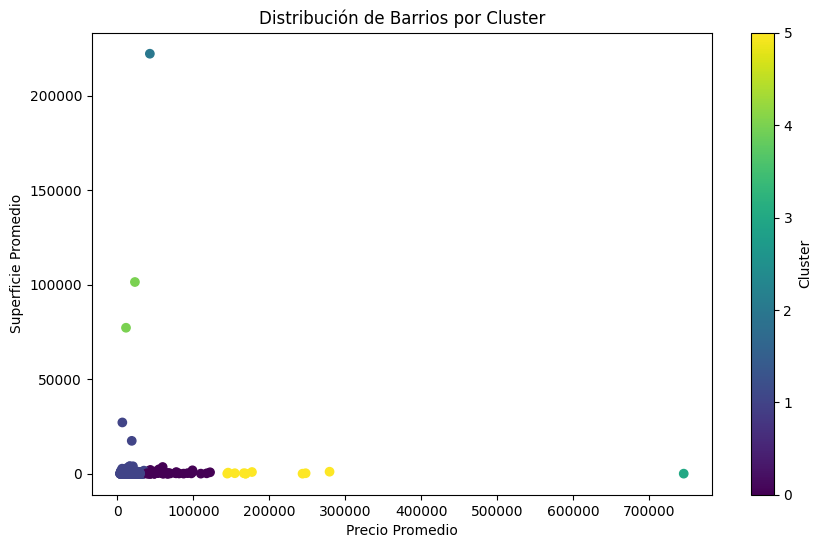

In [294]:
import matplotlib.pyplot as plt

# Gráfico para visualizar los clusters
plt.figure(figsize=(10, 6))
plt.scatter(barrio_stats['Precio_Promedio'], barrio_stats['Superficie_Promedio'], c=barrio_stats['Cluster'], cmap='viridis')
plt.colorbar(label='Cluster')
plt.xlabel('Precio Promedio')
plt.ylabel('Superficie Promedio')
plt.title('Distribución de Barrios por Cluster')
plt.show()


#### 16. ITE_ADD_STATE_NAME
One hot para las 4 zonas.
Capital Federal        143041
Bs.As. G.B.A. Norte     43576
Bs.As. G.B.A. Oeste     30029
Bs.As. G.B.A. Sur       23885


In [407]:
df = pd.get_dummies(df, columns=['ITE_ADD_STATE_NAME'], prefix='state')

#### 17. ITE_ADD_CITY_NAME
Se agruparon las ciudades con menos de 1000 propiedades en la categoria 'otros' y se hizo one-hot.

In [408]:
threshold = 1000
city_counts = df['ITE_ADD_CITY_NAME'].value_counts()
df['ITE_ADD_CITY_NAME'] = df['ITE_ADD_CITY_NAME'].apply(
    lambda x: x if city_counts[x] >= threshold else 'Otros'
)
df = pd.get_dummies(df, columns=['ITE_ADD_CITY_NAME'], prefix='city')


#### 18. ITE_ADD_NEIGHBORHOOD_NAME

In [409]:
"""df = df.dropna(subset=['ITE_ADD_NEIGHBORHOOD_NAME'])
threshold = 5000
neighbourhood_counts = df['ITE_ADD_NEIGHBORHOOD_NAME'].value_counts()
df['ITE_ADD_NEIGHBORHOOD_NAME'] = df['ITE_ADD_NEIGHBORHOOD_NAME'].apply(
    lambda x: x if neighbourhood_counts[x] >= threshold else 'Otros'
)
df = pd.get_dummies(df, columns=['ITE_ADD_NEIGHBORHOOD_NAME'], prefix='ITE_ADD_NEIGHBORHOOD_NAME')
df.head()"""

"df = df.dropna(subset=['ITE_ADD_NEIGHBORHOOD_NAME'])\nthreshold = 5000\nneighbourhood_counts = df['ITE_ADD_NEIGHBORHOOD_NAME'].value_counts()\ndf['ITE_ADD_NEIGHBORHOOD_NAME'] = df['ITE_ADD_NEIGHBORHOOD_NAME'].apply(\n    lambda x: x if neighbourhood_counts[x] >= threshold else 'Otros'\n)\ndf = pd.get_dummies(df, columns=['ITE_ADD_NEIGHBORHOOD_NAME'], prefix='ITE_ADD_NEIGHBORHOOD_NAME')\ndf.head()"

#### 19. Precios

Hay que chequear esto, ni lo corri. Hay que definir que hacer con los precios que no estan y que hacer con los precios que no tienen sentido, es decir que estan fuera del umbral

In [410]:
# Manejo de Outliers
lower_bound = 3173.03  # Percentil 1%
upper_bound = 2084209.05  # Percentil 99%

df = df[(df['precio_pesos_constantes'] >= lower_bound) & 
        (df['precio_pesos_constantes'] <= upper_bound)]


In [411]:
print(df['precio_pesos_constantes'].describe())


count    2.357330e+05
mean     3.053043e+04
std      1.002145e+05
min      3.173039e+03
25%      6.724878e+03
50%      9.377264e+03
75%      1.913097e+04
max      2.081862e+06
Name: precio_pesos_constantes, dtype: float64


#### 20. Agrego más features

Más features relacionadas con los M2

In [412]:
df = df[df['SConstrM2'] <= df['STotalM2']]

df['SNoConstrM2'] = df['STotalM2'] - df['SConstrM2']
df['SConstrRatio'] = df['SConstrM2'] / df['STotalM2']
df['SNoConstrRatio'] = 1 - df['SConstrRatio']
df['precio/M2'] = df['precio_pesos_constantes']/df['STotalM2']


In [413]:
# Crear el mean encoding para ITE_ADD_NEIGHBORHOOD_NAME

df = df.dropna(subset=['ITE_ADD_NEIGHBORHOOD_NAME'])

mean_encoding = df.groupby('ITE_ADD_NEIGHBORHOOD_NAME')['precio/M2'].mean()

# Mapear los valores de mean encoding al dataframe original
df['ITE_ADD_NEIGHBORHOOD_MEAN'] = df['ITE_ADD_NEIGHBORHOOD_NAME'].map(mean_encoding)

# Verificar el resultado
df.drop(columns=['ITE_ADD_NEIGHBORHOOD_NAME'], inplace=True)
#print(df[['ITE_ADD_NEIGHBORHOOD_NAME', 'ITE_ADD_NEIGHBORHOOD_MEAN']].head())

Columna que reune todos los servicios

In [414]:
x = ['AreaJuegosInfantiles', 'Chimenea', 'Ascensor', 'SalonFiestas', 'Seguridad', 
     'Pileta', 'Cocheras', 'PistaJogging', 'EstacionamientoVisitas', 'Lobby', 
     'AreaParrillas', 'CanchaTennis', 'AreaCine', 'LocalesComerciales', 'Amoblado', 
     'Jacuzzi', 'AccesoInternet', 'BusinessCenter', 'Gimnasio', 'Laundry', 
     'Calefaccion', 'SalonDeUsosMul', 'AireAC', 'Recepcion', 'Estacionamiento']

df['TieneServicios'] = df[x].any(axis=1).astype(int)


In [415]:
df['TieneServicios'].value_counts()

TieneServicios
1    147928
0     70707
Name: count, dtype: int64

## Una vez finalizado el Preprocesamiento lo paso a CSV

In [416]:
#df.to_csv('/Users/victoria/Desktop/alquiler_procesado.csv', index=False)

In [417]:
df.to_csv('/Users/benjavitale/Documents/ML/TP_F/alquiler_procesado.csv', index=False)